# PLA in MNIST

In [4]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


## Load MNIST

In [5]:
from keras.datasets import mnist

In [6]:
# load data
(X_train_image, y_train_label),(X_test_image, y_test_label) = mnist.load_data()

In [7]:
# show data size of train / test data
print('train data=', len(X_train_image))
print('test data=', len(X_test_image))

train data= 60000
test data= 10000


In [8]:
# image reshape
X_train = X_train_image.reshape(60000,-1).astype('float32')
X_test = X_test_image.reshape(10000,-1).astype('float32')

In [9]:
# normalize
X_train_normalize = np_utils.normalize(X_train)
X_test_normalize = np_utils.normalize(X_test)

In [10]:
# one-hot enocding
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

## Multi - layer perceptron (MLP) 

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Dense 是全連接層
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu')) # normal distribution常態分佈初始化weights
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()
# param = Hyper-Parameters, 代表需要透過back-propagation計算的權重數量
# input&hidden layer param: (784 + 1(bias)) * 256
# output layer param: (256 + 1) * 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 設定以accurancy評估model

In [14]:
train_history = model.fit(x=X_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=200,verbose=2)
# validation: cross validation ratio

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 10s - loss: 0.5464 - acc: 0.8695 - val_loss: 0.2597 - val_acc: 0.9278
Epoch 2/10
 - 11s - loss: 0.2357 - acc: 0.9314 - val_loss: 0.1925 - val_acc: 0.9456
Epoch 3/10
 - 12s - loss: 0.1759 - acc: 0.9492 - val_loss: 0.1579 - val_acc: 0.9564
Epoch 4/10
 - 10s - loss: 0.1381 - acc: 0.9602 - val_loss: 0.1367 - val_acc: 0.9614
Epoch 5/10
 - 10s - loss: 0.1120 - acc: 0.9680 - val_loss: 0.1181 - val_acc: 0.9663
Epoch 6/10
 - 10s - loss: 0.0927 - acc: 0.9735 - val_loss: 0.1100 - val_acc: 0.9678
Epoch 7/10
 - 10s - loss: 0.0782 - acc: 0.9782 - val_loss: 0.1017 - val_acc: 0.9703
Epoch 8/10
 - 10s - loss: 0.0672 - acc: 0.9817 - val_loss: 0.0939 - val_acc: 0.9722
Epoch 9/10
 - 11s - loss: 0.0580 - acc: 0.9839 - val_loss: 0.0889 - val_acc: 0.9728
Epoch 10/10
 - 11s - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0833 - val_acc: 0.9753


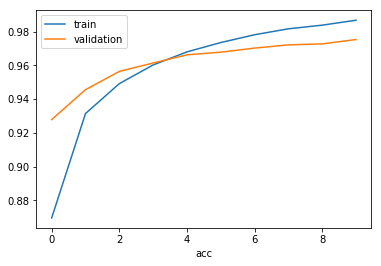

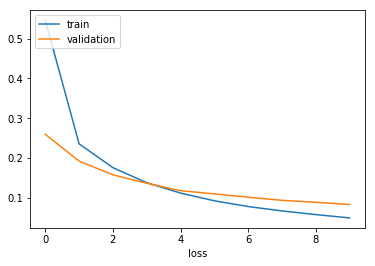

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('Epochs')
    plt.xlabel(train)
    plt.legend(['train', 'validation'], loc=2)
    plt.show()
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [16]:
# evaluate model
score = model.evaluate(X_test_normalize, y_test_onehot)
score

10000/10000 [==============================] - 2s 151us/step


[0.07744461914598942, 0.9762]

In [17]:
#predciton
prediction = model.predict_classes(X_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## Confusion matrix

In [18]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,1,0,0,0,1,1,3,0
1,0,1122,4,0,0,1,3,0,5,0
2,5,0,1013,2,1,0,2,3,6,0
3,0,0,8,993,0,0,0,1,5,3
4,2,1,6,1,943,0,2,1,3,23
5,8,1,1,27,2,818,13,1,16,5
6,10,3,3,1,2,3,931,0,5,0
7,3,5,18,9,0,0,0,976,3,14
8,4,0,4,6,1,0,1,2,955,1


In [19]:
df = pd.DataFrame({'label': y_test_label, 'prediction': prediction})
df.head()

,label,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [20]:
# 找出真實是5但預測為3的資料
df[(df.label==5) & (df.prediction==3)]

,label,prediction
340,5,3
412,5,3
1003,5,3
1082,5,3
1393,5,3
1670,5,3
1970,5,3
2035,5,3
2526,5,3
2545,5,3


## Dropout

In [21]:
from keras.layers import Dropout

In [22]:
# Dense 是全連接層
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu')) # normal distribution常態分佈初始化weights
model.add(Dropout(0.5)) #隨機放棄50%的units避免overfitting
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()
# param = Hyper-Parameters, 代表需要透過back-propagation計算的權重數量
# input&hidden layer param: (784 + 1(bias)) * 256
# output layer param: (256 + 1) * 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 設定以accurancy評估model
train_history = model.fit(x=X_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=200,verbose=2)
# validation: cross validation ratio

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 13s - loss: 0.6040 - acc: 0.8510 - val_loss: 0.2768 - val_acc: 0.9223
Epoch 2/10
 - 11s - loss: 0.2692 - acc: 0.9212 - val_loss: 0.2082 - val_acc: 0.9417
Epoch 3/10
 - 12s - loss: 0.2082 - acc: 0.9389 - val_loss: 0.1699 - val_acc: 0.9534
Epoch 4/10
 - 12s - loss: 0.1713 - acc: 0.9508 - val_loss: 0.1460 - val_acc: 0.9595
Epoch 5/10
 - 12s - loss: 0.1457 - acc: 0.9575 - val_loss: 0.1293 - val_acc: 0.9628
Epoch 6/10
 - 12s - loss: 0.1258 - acc: 0.9635 - val_loss: 0.1163 - val_acc: 0.9658
Epoch 7/10
 - 12s - loss: 0.1084 - acc: 0.9684 - val_loss: 0.1097 - val_acc: 0.9669
Epoch 8/10
 - 12s - loss: 0.0991 - acc: 0.9717 - val_loss: 0.0996 - val_acc: 0.9701
Epoch 9/10
 - 12s - loss: 0.0893 - acc: 0.9746 - val_loss: 0.0953 - val_acc: 0.9708
Epoch 10/10
 - 13s - loss: 0.0799 - acc: 0.9772 - val_loss: 0.0906 - val_acc: 0.9726


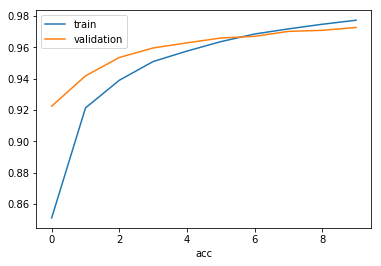

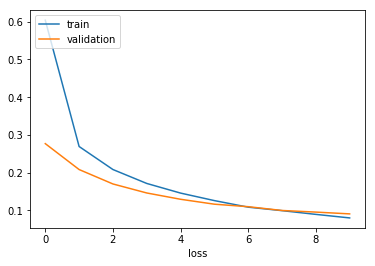

In [24]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [25]:
scores = model.evaluate(X_test_normalize, y_test_onehot)
scores

10000/10000 [==============================] - 2s 171us/step


[0.08638333470895887, 0.9739]

## MLP with two hidden layers and dropout

In [26]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 設定以accurancy評估model
train_history = model.fit(x=X_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=200,verbose=2)
# validation: cross validation ratio

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 27s - loss: 0.4377 - acc: 0.8685 - val_loss: 0.1690 - val_acc: 0.9500
Epoch 2/10
 - 24s - loss: 0.1709 - acc: 0.9485 - val_loss: 0.1199 - val_acc: 0.9641
Epoch 3/10
 - 24s - loss: 0.1251 - acc: 0.9621 - val_loss: 0.0967 - val_acc: 0.9699
Epoch 4/10
 - 24s - loss: 0.0963 - acc: 0.9713 - val_loss: 0.0861 - val_acc: 0.9736
Epoch 5/10
 - 24s - loss: 0.0822 - acc: 0.9739 - val_loss: 0.0816 - val_acc: 0.9758
Epoch 6/10
 - 24s - loss: 0.0702 - acc: 0.9779 - val_loss: 0.0715 - val_acc: 0.9779
Epoch 7/10
 - 24s - loss: 0.0611 - acc: 0.9809 - val_loss: 0.0728 - val_acc: 0.9786
Epoch 8/10
 - 24s - loss: 0.0540 - acc: 0.9827 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 9/10
 - 25s - loss: 0.0485 - acc: 0.9841 - val_loss: 0.0745 - val_acc: 0.9788
Epoch 10/10
 - 24s - loss: 0.0435 - acc: 0.9859 - val_loss: 0.0691 - val_acc: 0.9795


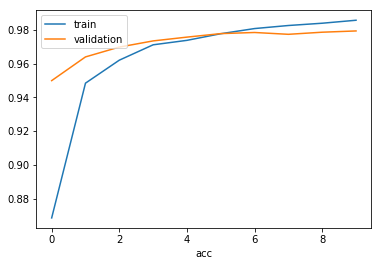

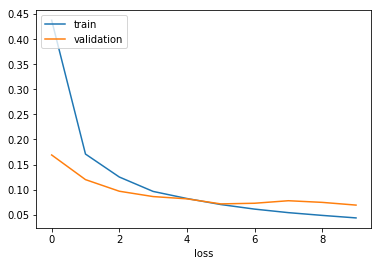

10000/10000 [==============================] - 3s 300us/step


[0.057559526505565735, 0.982]

In [28]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(X_test_normalize, y_test_onehot)
scores